# Importing relevent libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic

# Importing Dataset

In [143]:
data =pd.read_csv("mcdonalds.csv")

In [144]:
print(np.array(data.columns))

['yummy' 'convenient' 'spicy' 'fattening' 'greasy' 'fast' 'cheap' 'tasty'
 'expensive' 'healthy' 'disgusting' 'Like' 'Age' 'VisitFrequency' 'Gender']


In [145]:
print(data.shape)

(1453, 15)


In [146]:
print(data.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [147]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [148]:
mean_values = np.mean(seg_var,axis = 0 )
mean_values

yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
cluster_num    1.325533
dtype: float64

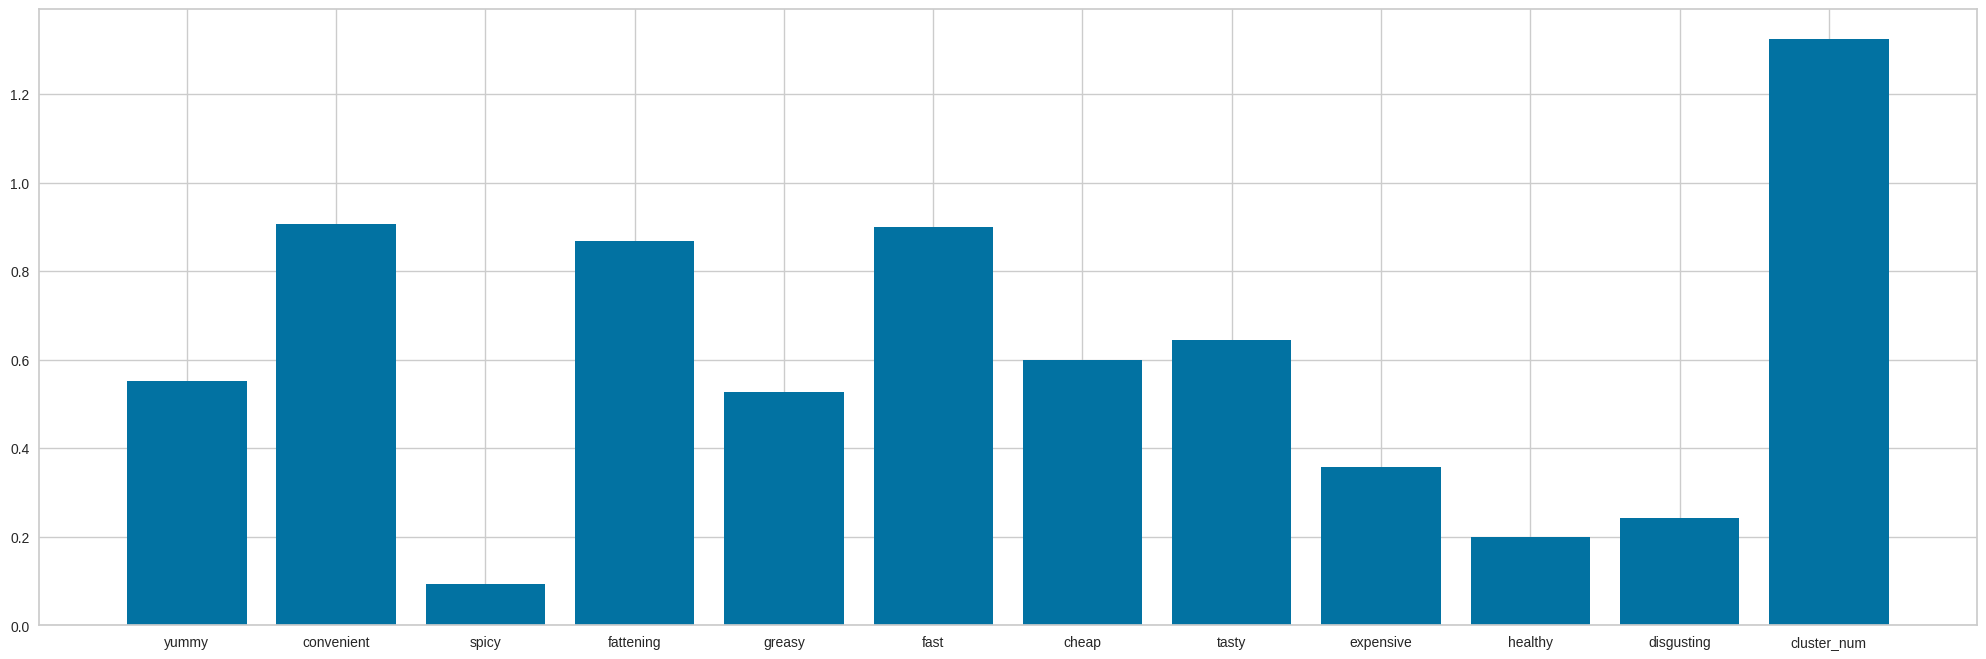

In [149]:
plt.bar(mean_values.index, mean_values)
plt.show()



*  From the  above graph we can have following info.
*  Nearly all the people think eating food at mcdonald is convienient.
*  Just over 50% customers think it is cheap and tasty.
*  only 20% thinks its discusting so the company need to firmly focus on that 20% and take review on what to improve.



# Exploring Data

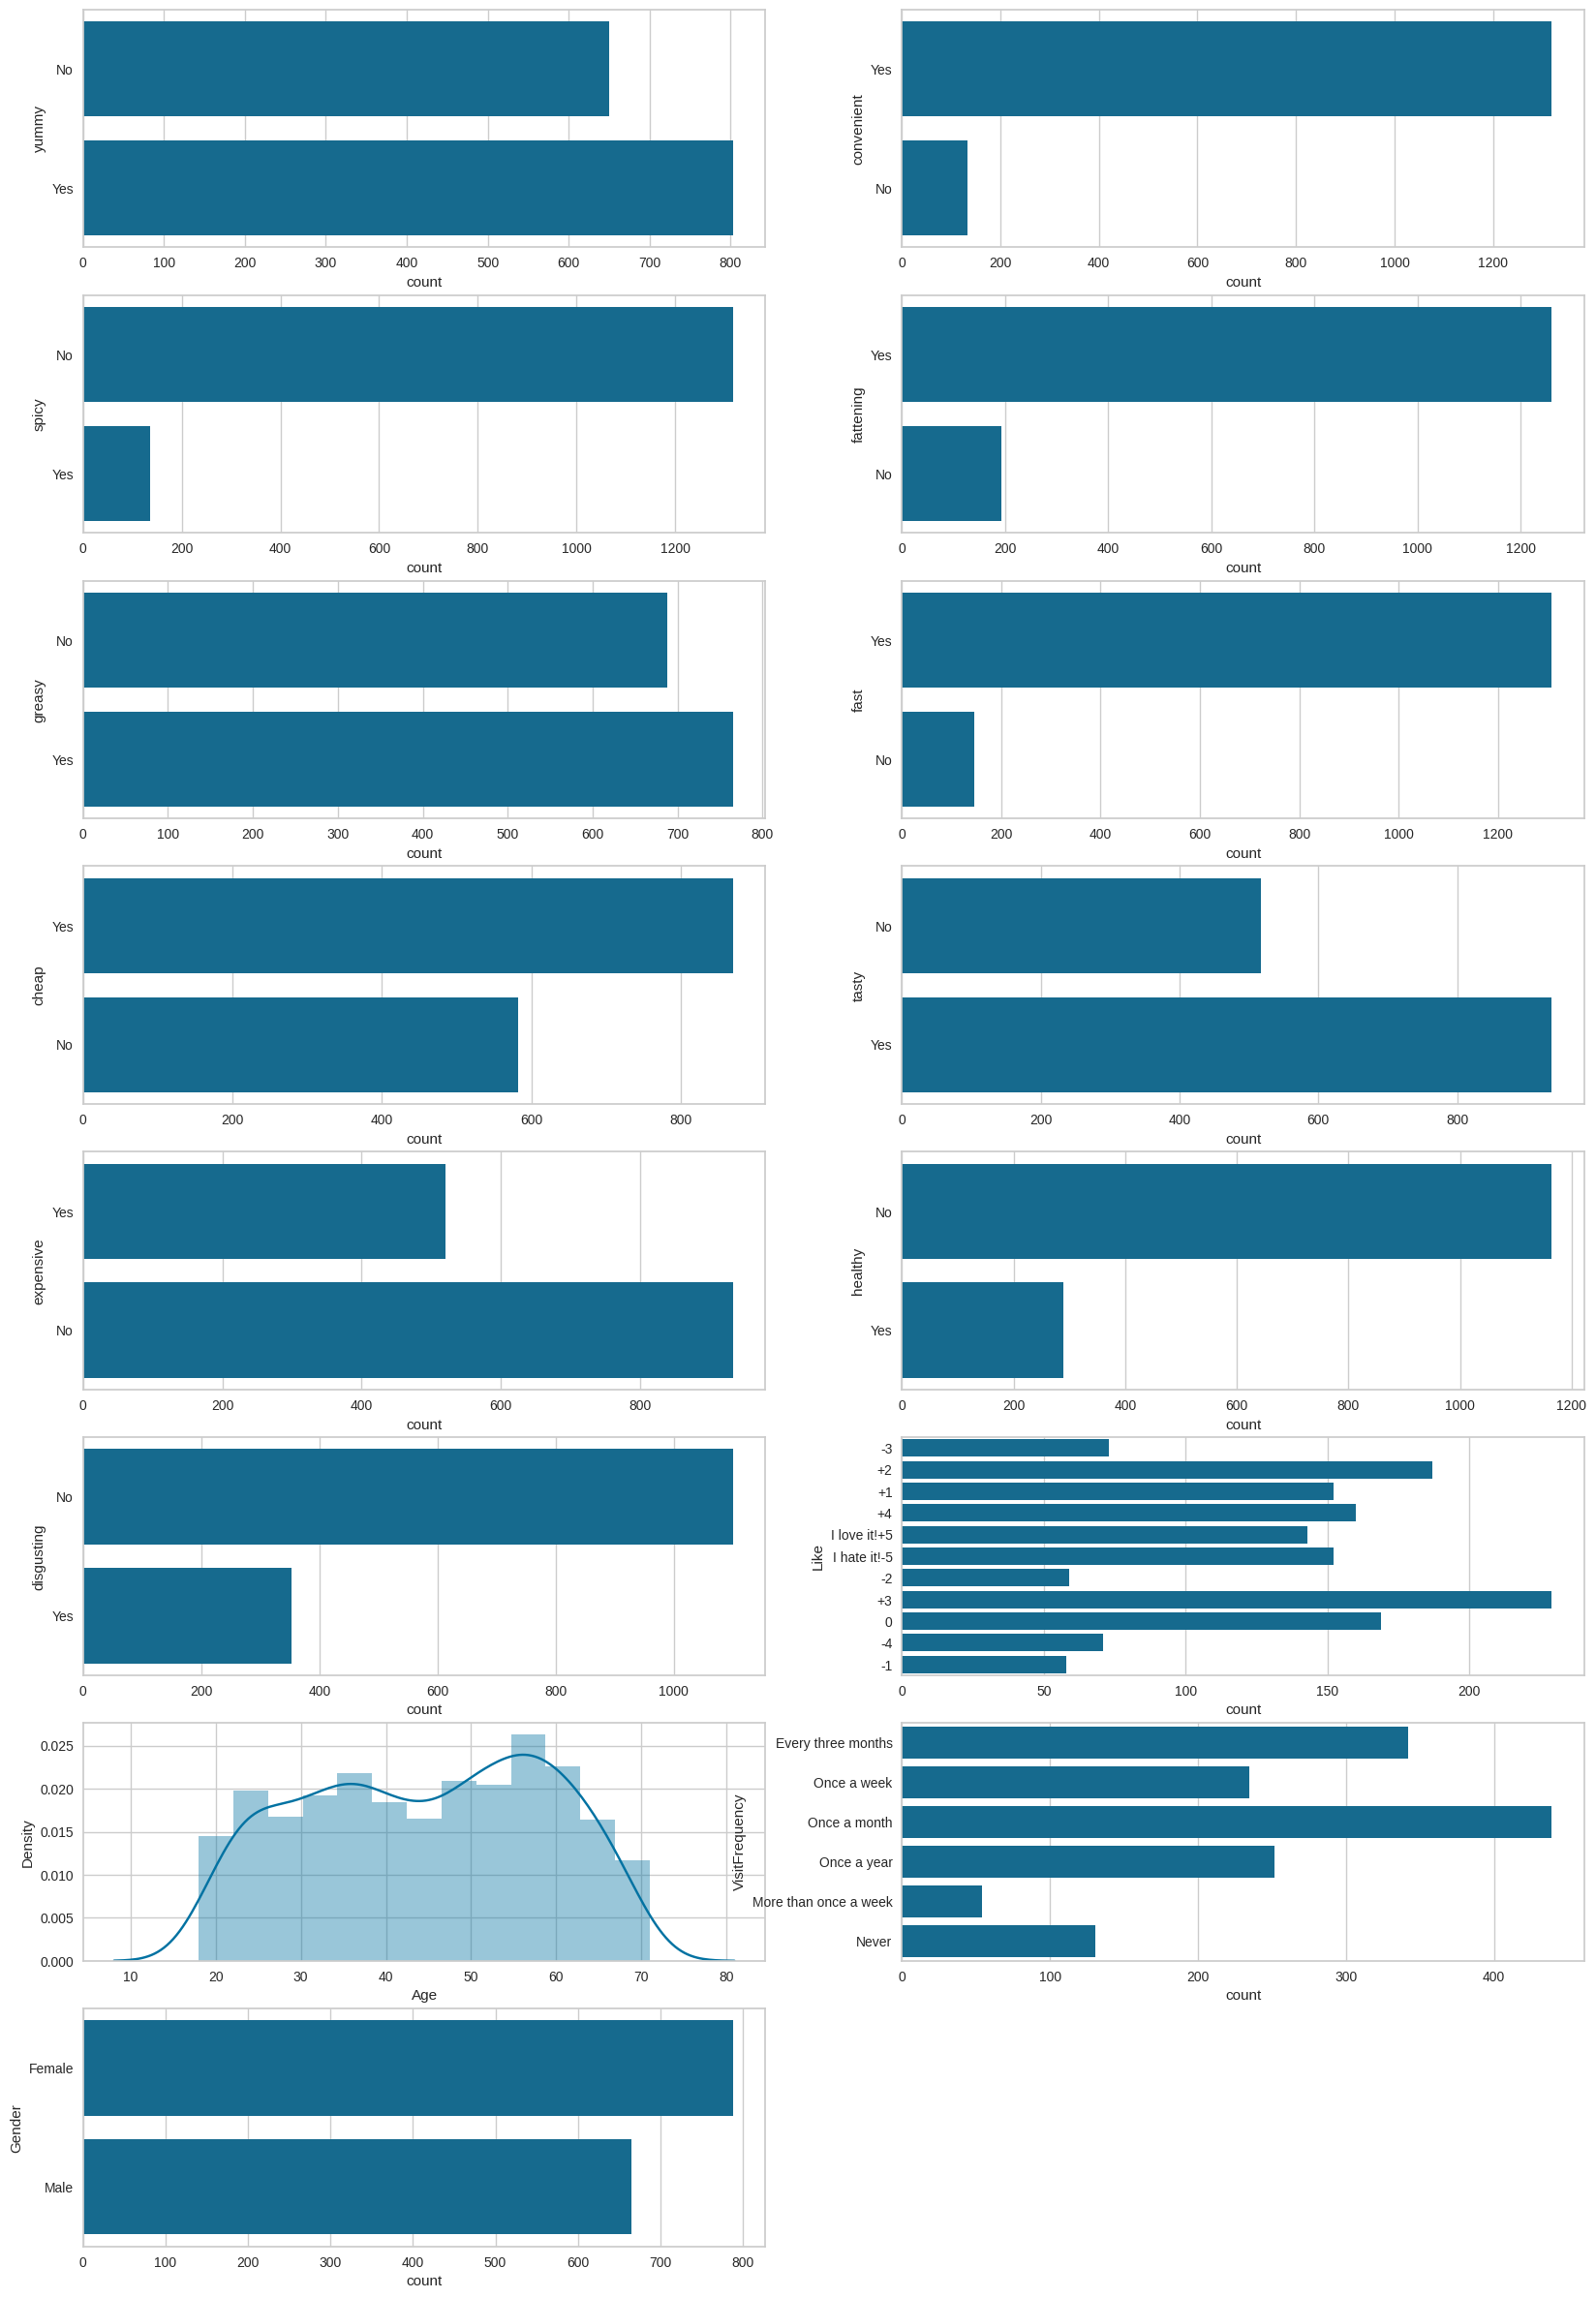

In [150]:

def EDA(df,figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])
EDA(data, (20, 30))

# **Socia-demographic representation**

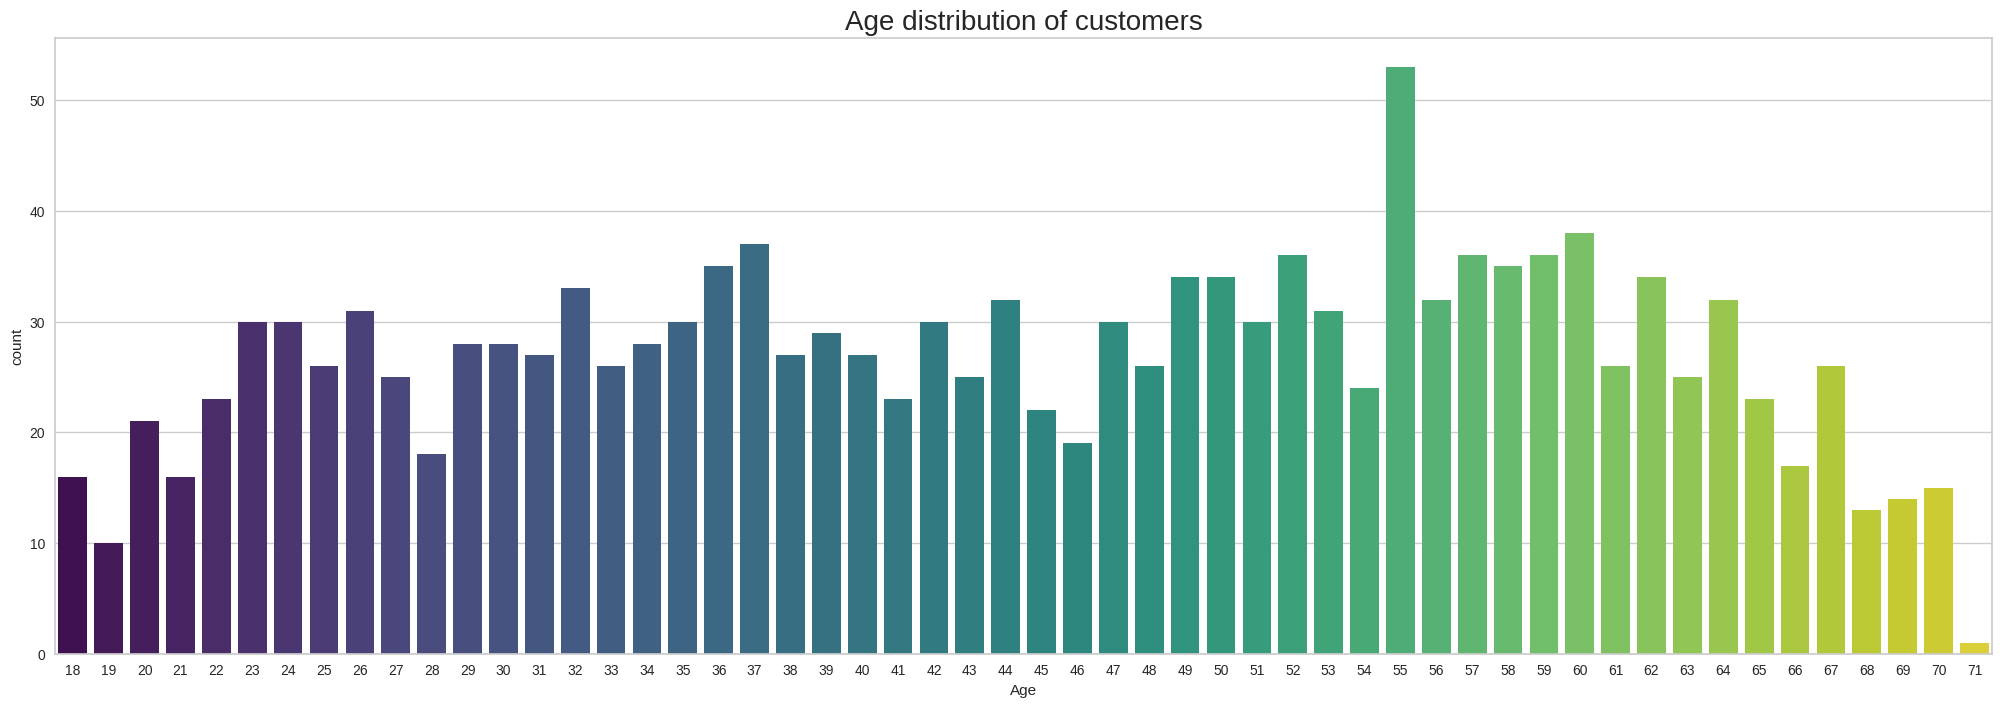

In [151]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(x=data['Age'], palette = 'viridis')
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

# Data preprocessing

In [152]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [153]:
def transform(element):
    if element == "Yes":
        element = 1
    else :
        element = 0
    return element

In [154]:
seg_var = data.iloc[:,:11].applymap(transform)

In [155]:
seg_var

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


# Applying PCA

In [156]:

pca = PCA()
pca = pca.fit(seg_var)

std_deviation = np.sqrt(pca.explained_variance_)
prop_variance = pca.explained_variance_ratio_
cumulative_prop = np.cumsum(prop_variance)

summary_df = pd.DataFrame({
    "Standard deviation": np.round(std_deviation,4),
    "Proportion of Variance": np.round(prop_variance,4),
    "Cumulative Proportion": np.round(cumulative_prop,4),
}, index=[f"PC{i+1}" for i in range(0,11)])
print("                        importance of components ")
print(summary_df)

                        importance of components 
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1               0.7570                  0.2994                 0.2994
PC2               0.6075                  0.1928                 0.4922
PC3               0.5046                  0.1330                 0.6253
PC4               0.3988                  0.0831                 0.7084
PC5               0.3374                  0.0595                 0.7679
PC6               0.3103                  0.0503                 0.8182
PC7               0.2897                  0.0438                 0.8620
PC8               0.2751                  0.0395                 0.9016
PC9               0.2653                  0.0368                 0.9383
PC10              0.2488                  0.0324                 0.9707
PC11              0.2369                  0.0293                 1.0000


From the above info it is clear that pca1 and pca2 collectively cover over 50% of the variable info

In [157]:
print("Standard deviation : " ,np.round(std_deviation, 1))

Standard deviation :  [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [158]:
factor_loadings = pca.components_


columns = [f"PC{i+1}" for i in range(factor_loadings.shape[0])]
index = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
factor_loadings_df = pd.DataFrame(factor_loadings.T, columns=columns, index=index)

print("                                   Factor Loadings")
print(factor_loadings_df)

                                   Factor Loadings
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11

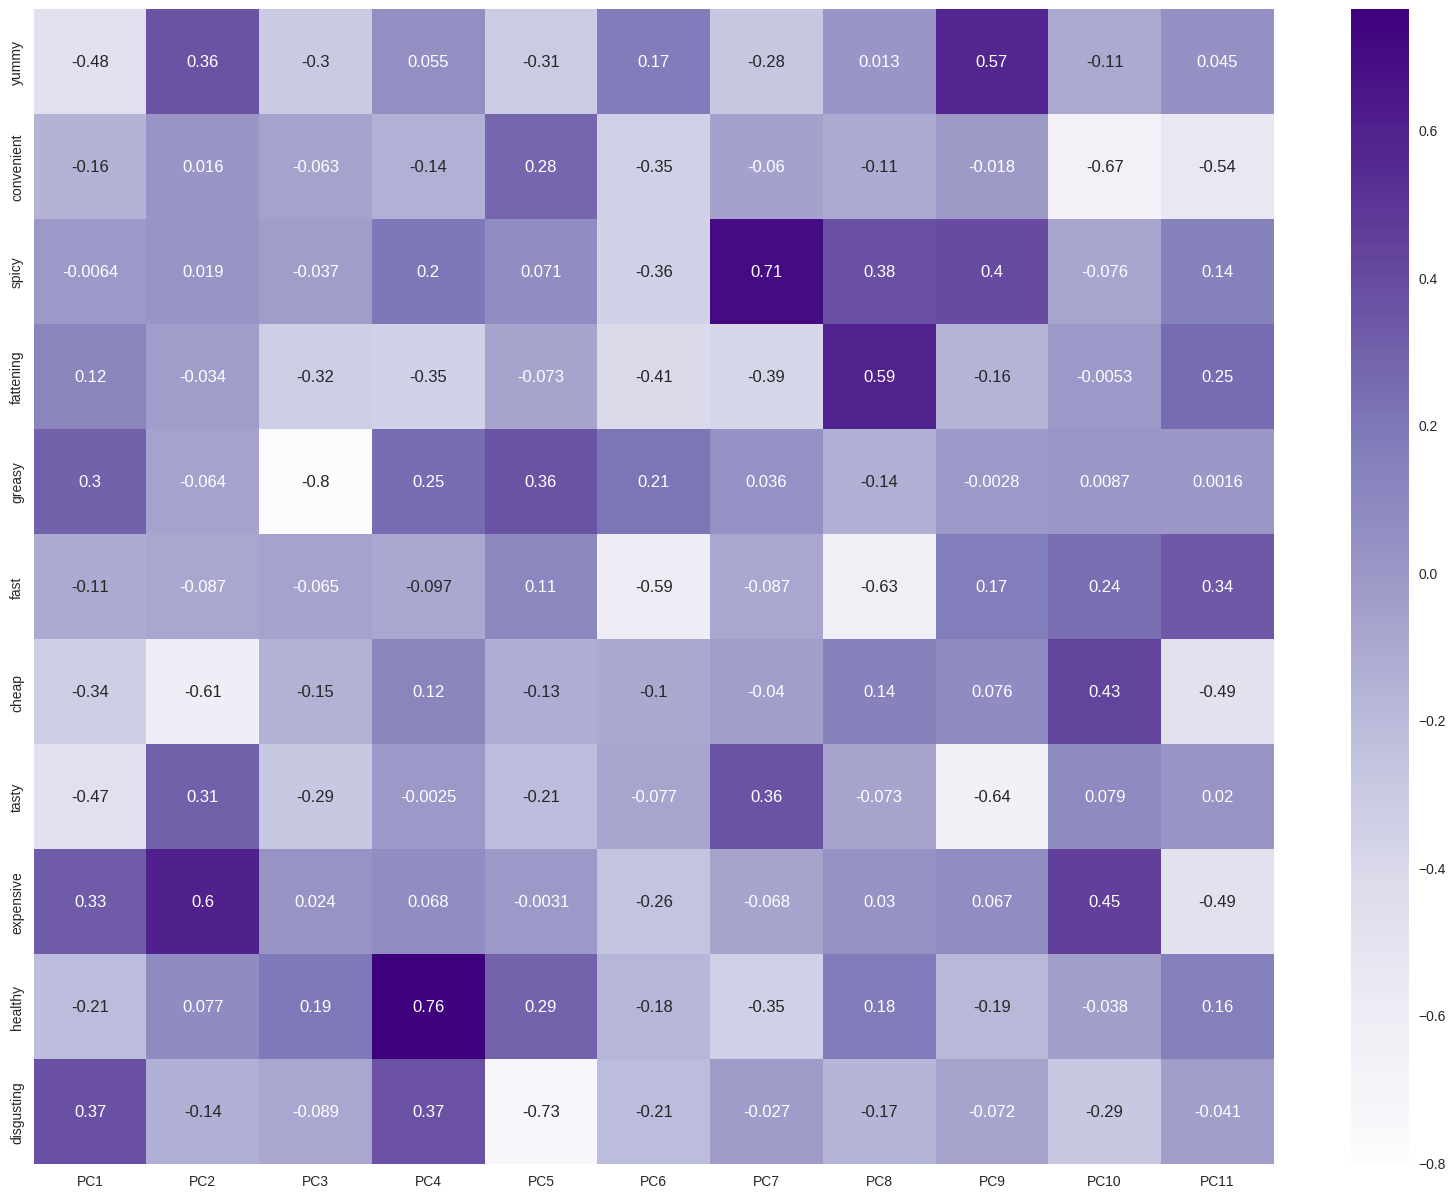

In [159]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(factor_loadings_df, annot=True, cmap='Purples')
plt.show()

* From the above graph we can se how much an individual variable contribute to the pca variable

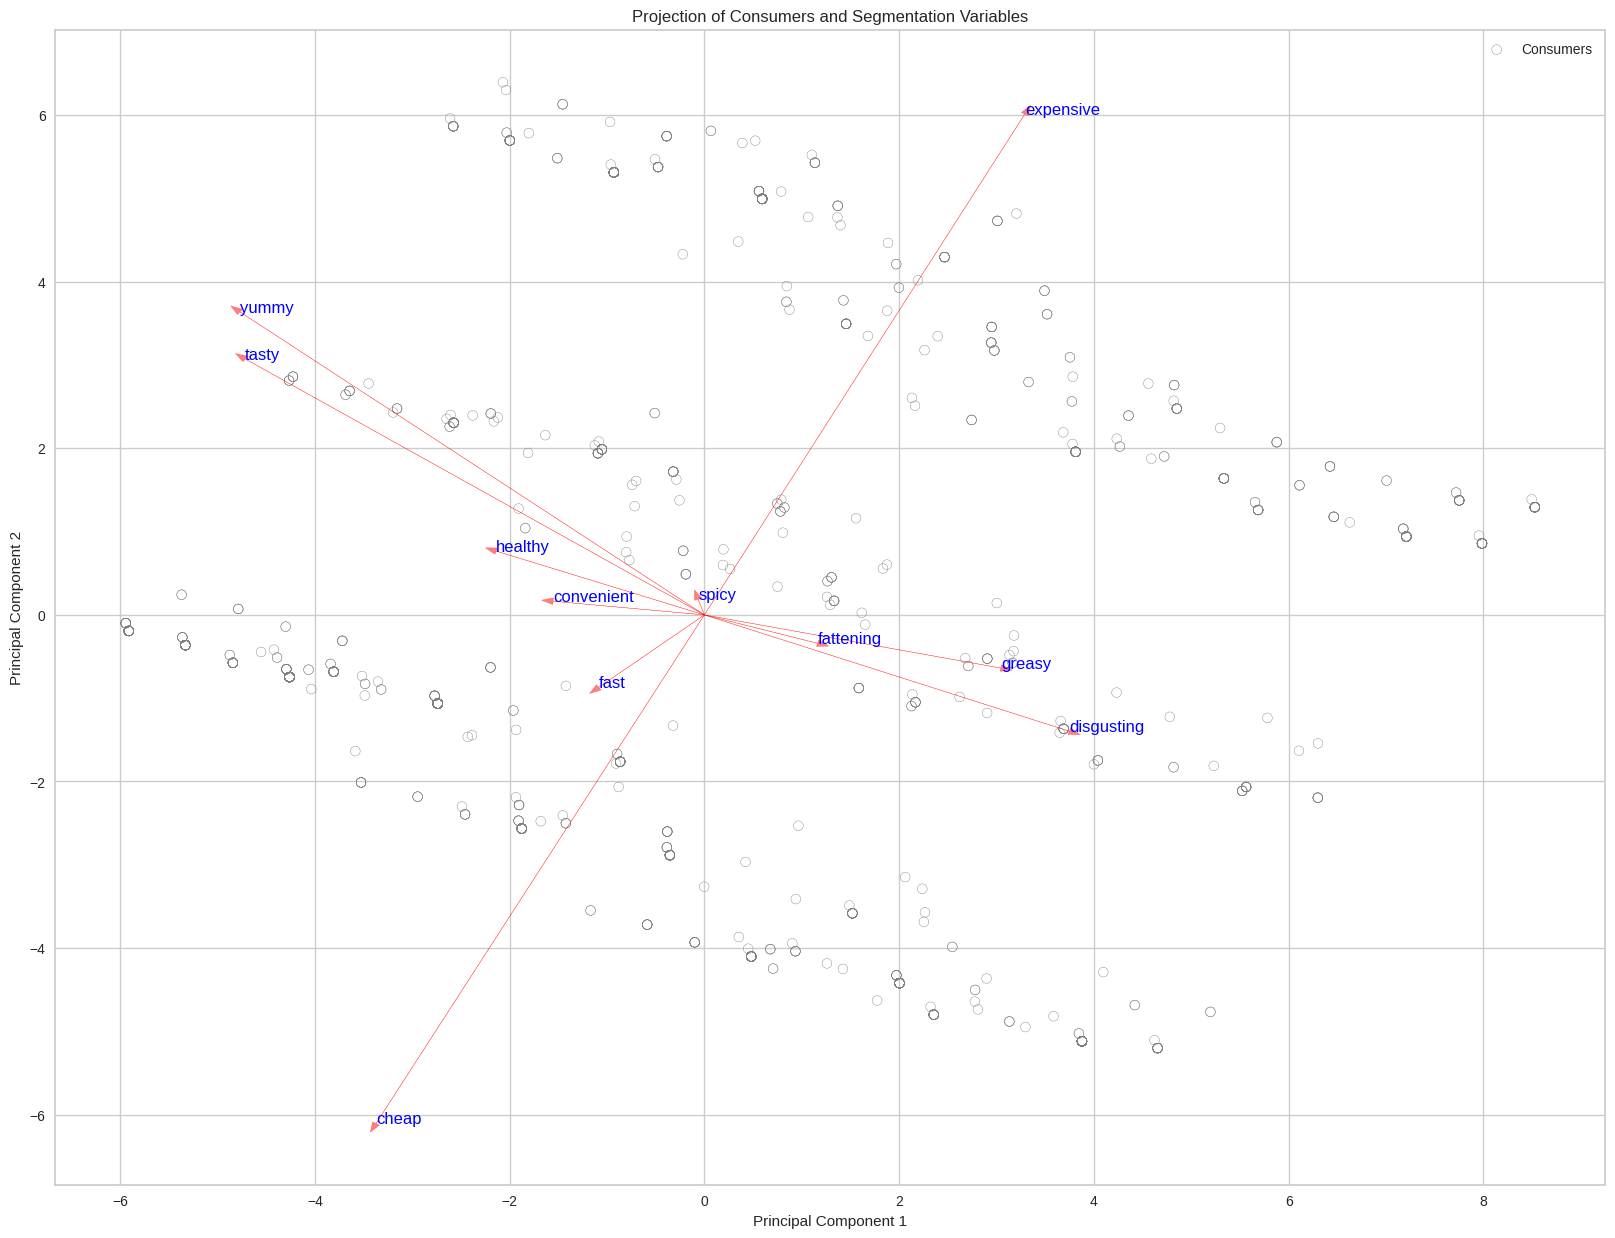

In [160]:
projected_data = pca.transform(seg_var)[:, :2]

# Plot consumers in grey
plt.scatter(projected_data[:, 0]*5, projected_data[:, 1]*5, color='grey', label='Consumers', marker='o', facecolor='none')

# Plot original segmentation variables as arrows
for i, var in enumerate(pca.components_[:].T):  # considering only first two components
    plt.arrow(0, 0, var[0]*10, var[1]*10, color='red', alpha= 0.5, width=0.001, head_width=0.08)
    plt.text(var[0]*10, var[1]*10, seg_var.columns[i],color = 'blue', fontsize='medium')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Consumers and Segmentation Variables')
plt.legend()
plt.show()

* From the above plot we can see that the people think its convinieant to eat at mcdonald, they also think the food is tasty, healthy,yummy
*  And the people who thinks the food is disgusting, fattening, greasy fall to the other side

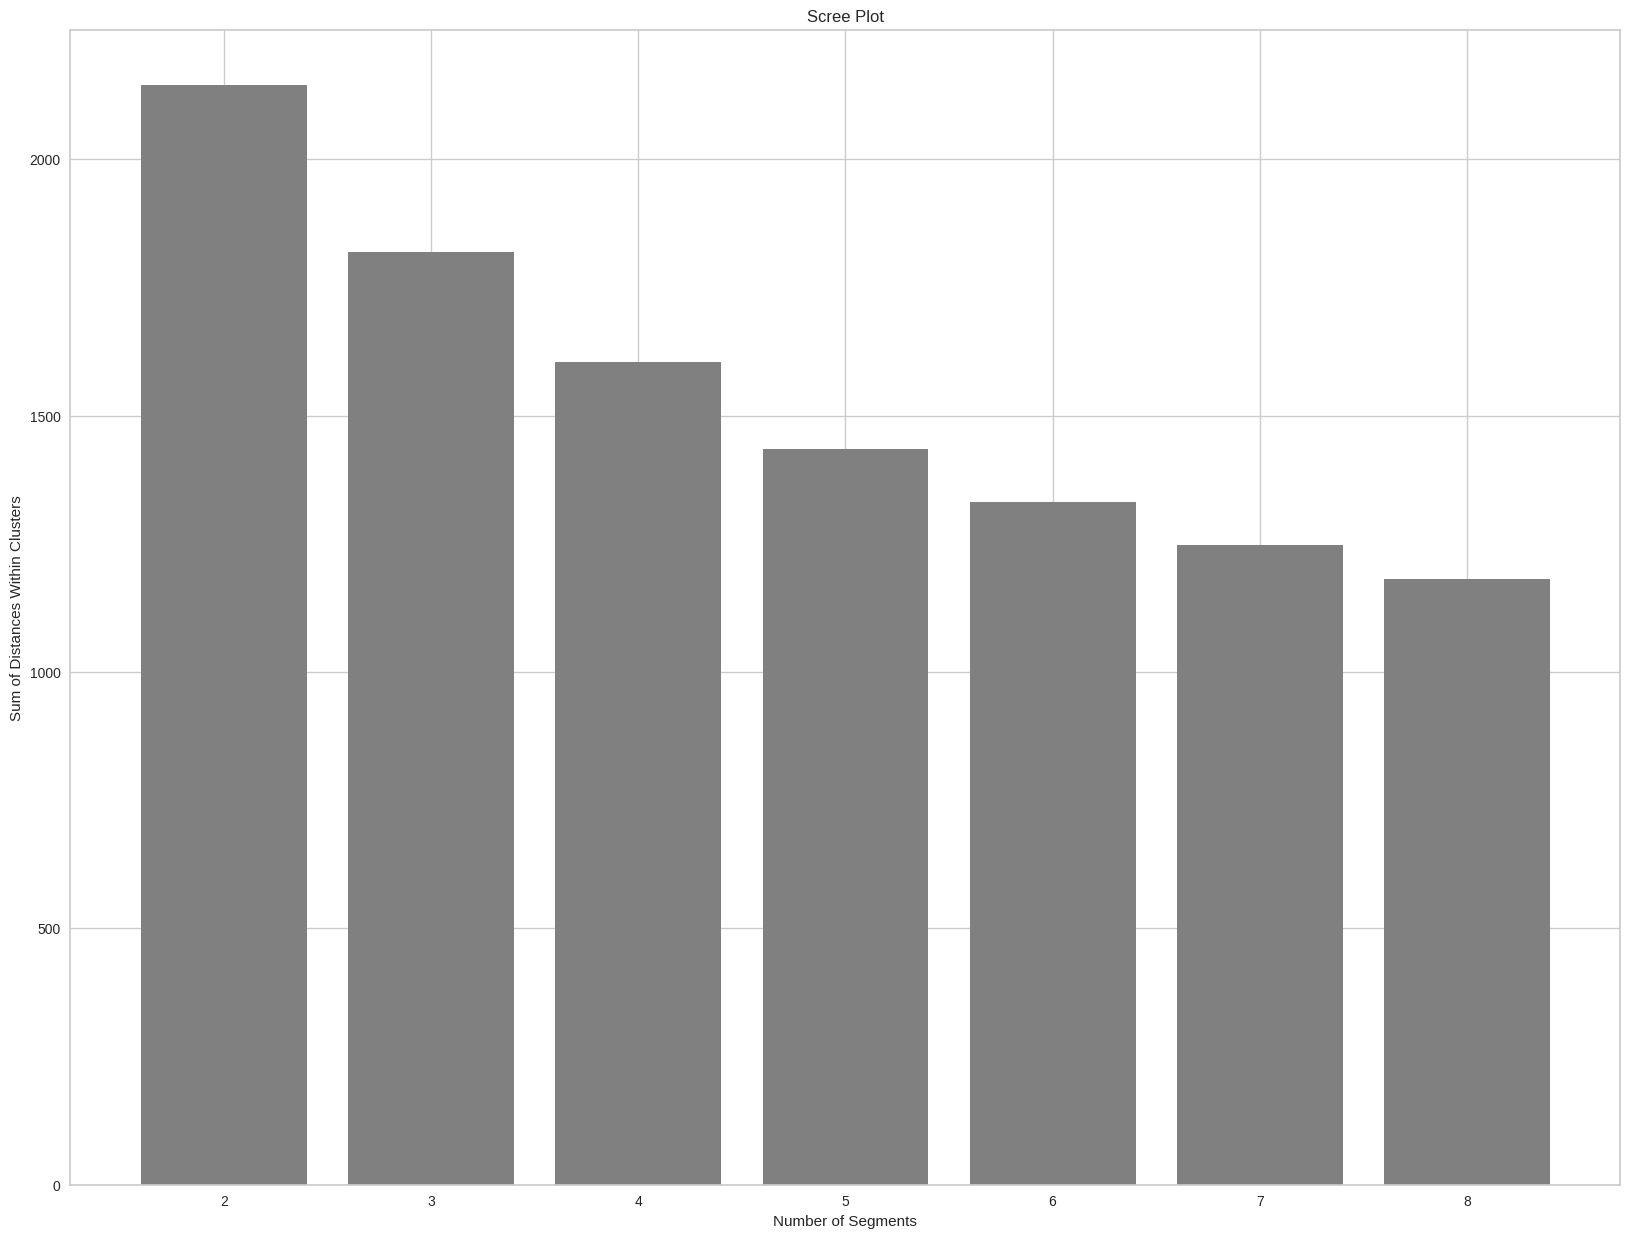

In [161]:



kmeans = KMeans()

np.random.seed(1234)
cluster_range = range(2, 9)
kmeans_models = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(seg_var)
    kmeans_models.append(kmeans)

sum_distances = [kmeans.inertia_ for kmeans in kmeans_models]
plt.bar(cluster_range, sum_distances, color='grey')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances Within Clusters')
plt.title('Scree Plot')
plt.show()

 ## using elbow method to deciode the number of cluster

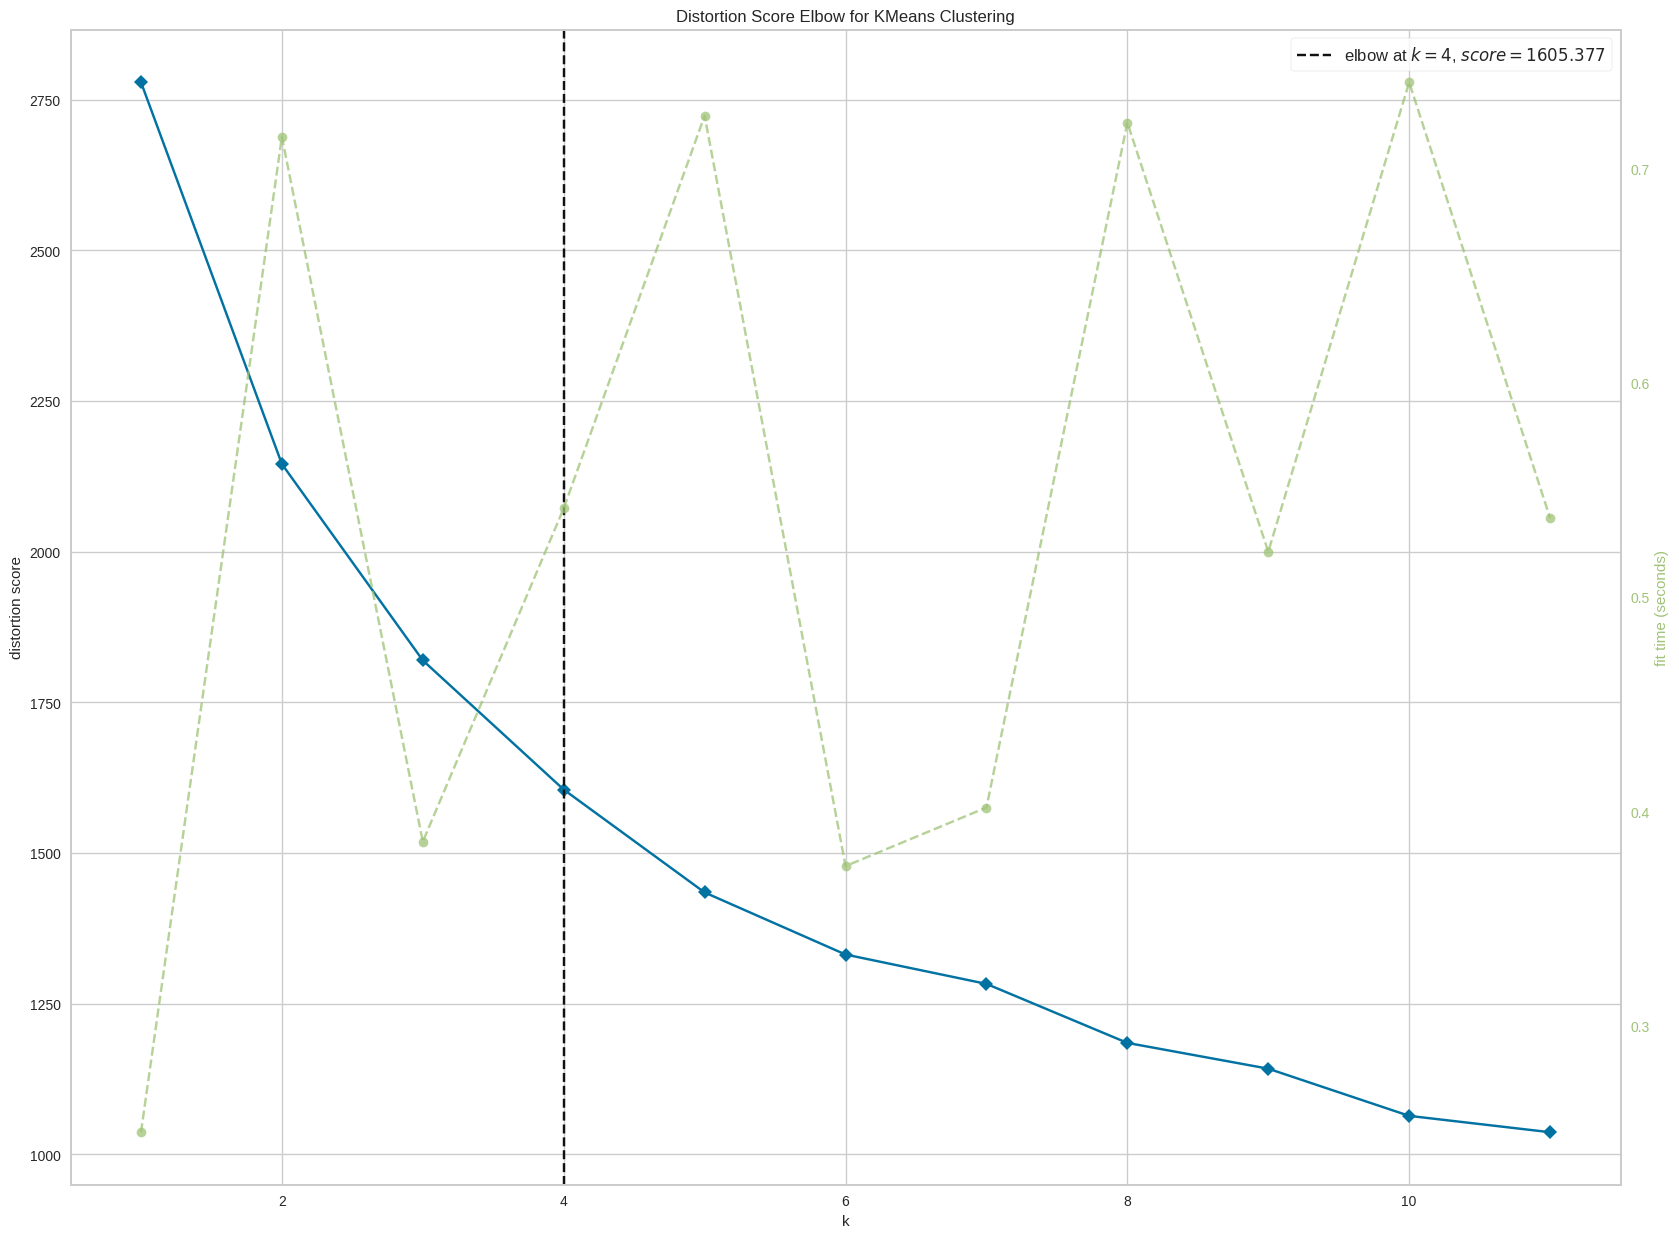

In [162]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(seg_var)
visualizer.show();

# Applying K-means clustering with 4 clusters

In [163]:
from sklearn.cluster import KMeans

In [164]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(seg_var)

# Creating a DataFrame to store cluster labels
data['cluster_num'] = kmeans.labels_ #adding to data

# Printing cluster information
print('Labels:', kmeans.labels_)
print('WCSS:', kmeans.inertia_)
print('No. of iterations:', kmeans.n_iter_)
print('Cluster centroids:', kmeans.cluster_centers_)
print('Cluster size:', Counter(kmeans.labels_))

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558923
No. of iterations: 7
Cluster centroids: [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size: Counter({1: 580, 0: 323, 2: 304, 3: 246})


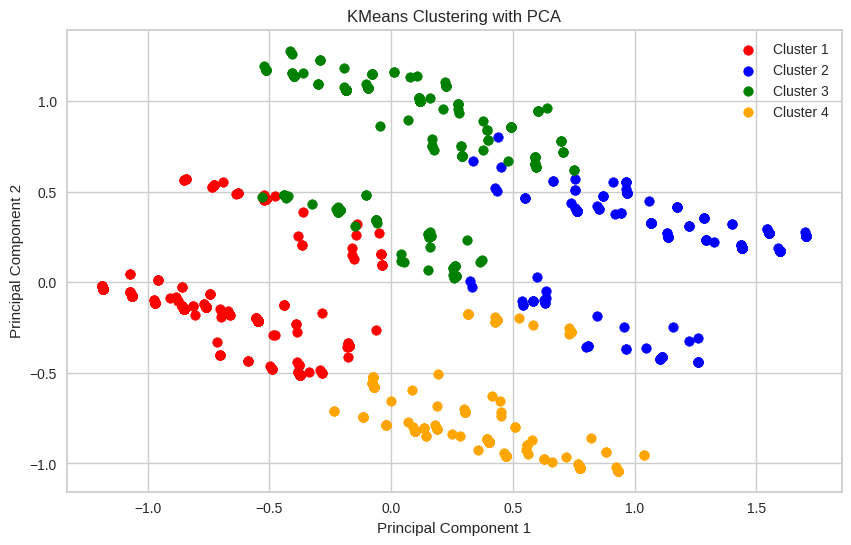

In [165]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(seg_var)

clusters = kmeans.predict(seg_var)

cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
cluster_colors = ['red', 'blue', 'green', 'orange']
plt.figure(figsize=(10, 6))
for cluster_idx in range(4):
    cluster_mask = clusters == cluster_idx
    plt.scatter(projected_data[cluster_mask, 0], projected_data[cluster_mask, 1], c=cluster_colors[cluster_idx], label=cluster_names[cluster_idx])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.legend()
plt.show()

# Describing Segments

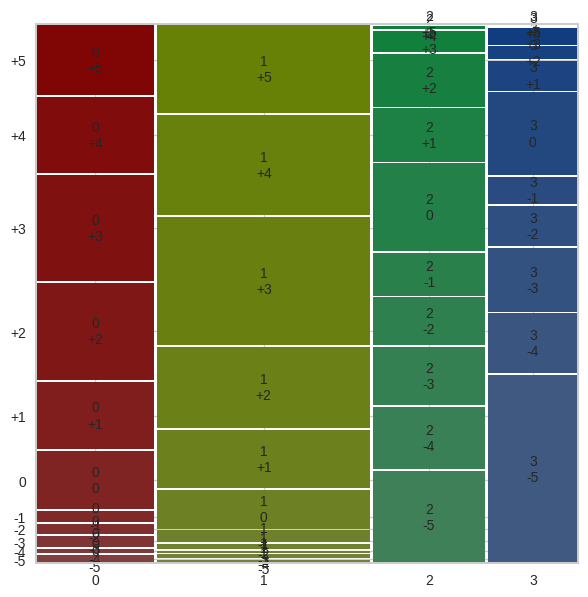

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


None

In [166]:
crosstab = pd.crosstab(data['cluster_num'], data['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

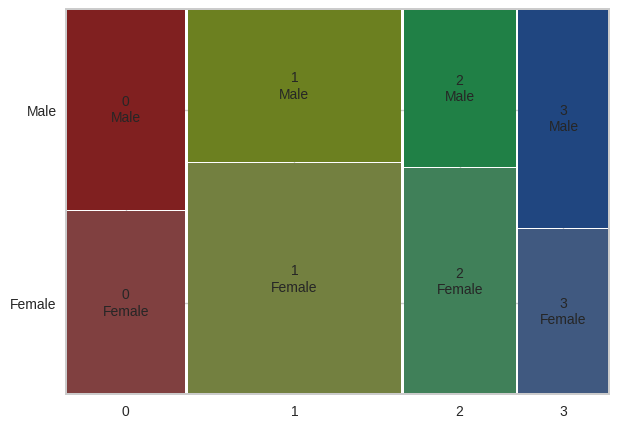

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


None

In [167]:
# crosstab creation
crosstab_gender = pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

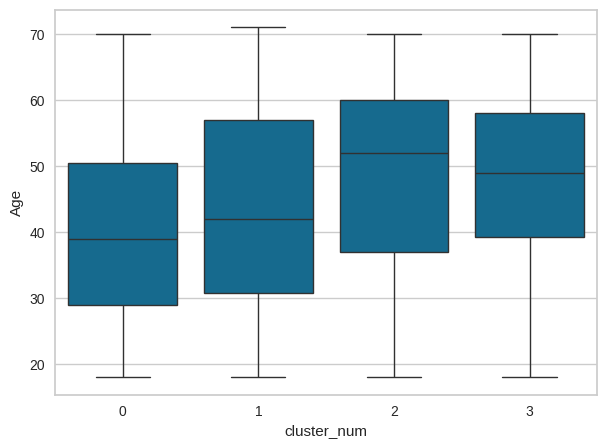

In [168]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=data);

# selecting target market segment

In [169]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [170]:
# calculating the mean of 'Like'
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like


,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [171]:
segment = Like.merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Like,VisitFrequency
0,0,3.275542,2.547988
1,1,2.962069,2.584483
2,2,6.171053,2.822368
3,3,7.422764,2.654472


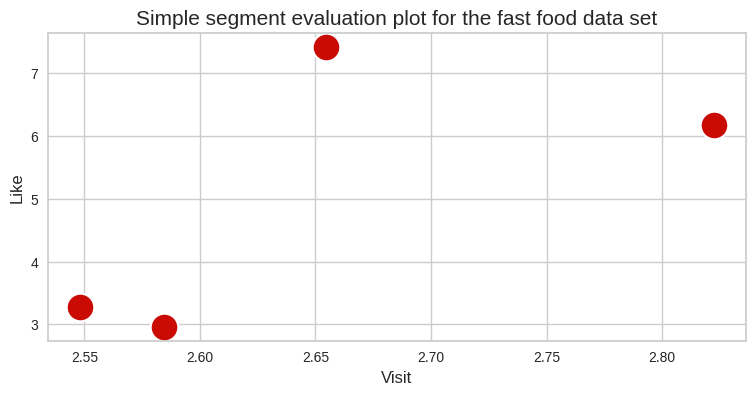

In [172]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()